# SPamCo with Ensembles

In [1]:
#Math packages
import numpy as np

#Data packages
import pandas as pd
import pandas_profiling

#Spamco
from spamco import SPamCo, Validation

#Data packages
from sklearn.datasets import make_moons, make_classification, make_circles, make_blobs, make_gaussian_quantiles
from sklearn.datasets import load_breast_cancer, load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

#Classifier packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

#Validation packages
from sklearn.metrics import accuracy_score

#Visualization packages
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.ticker import MaxNLocator
%matplotlib inline

import baycomp

#General utility packages
from itertools import cycle, islice
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 20})

In [2]:
def load_diabetes():
    df = pd.read_csv('Data/diabetes.csv')
    y =df.values[:,0]
    X =df.drop(['Diabetes_012','AnyHealthcare'], axis = 1).values
    return X, y

In [3]:
def load_blood():
    X, y = fetch_openml(data_id = 1464, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [4]:
def load_qsar():
    X, y = fetch_openml(data_id = 1494, return_X_y=True)
    X = X.drop(['V1'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [5]:
def load_eegeye():
    X, y = fetch_openml(data_id = 1471, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [6]:
def load_ilpd():
    X, y = fetch_openml(data_id = 1480, return_X_y=True)
    LE = LabelEncoder()
    X['V2'] = LE.fit_transform(X['V2'])
    X = X.values
    y = LE.fit_transform(y)
    return X, y

In [7]:
def load_click():
    X, y = fetch_openml(data_id = 1220, return_X_y=True)
    X = X.drop(['user_id'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [8]:
def load_satimage():
    X, y = fetch_openml(data_id = 182, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [9]:
def load_robot():
    X, y = fetch_openml(data_id = 300, return_X_y=True)
    X = X.drop(['f451'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [10]:
np.random.seed(1)
seed = np.random.randint(low = 1, high = 10000, size = 10)

In [11]:
seed

array([ 236, 5193,  906, 7814, 2896, 5057,  145, 4226, 7752, 3463])

# Toy Datasets

In [12]:
datasets = {
    'breast_cancer': load_breast_cancer(return_X_y=True),
    'digits': load_digits(return_X_y=True),
    'blood': load_blood(),
    'diabetes': load_diabetes(),
    'qsar': load_qsar(),
    'eegeye': load_eegeye(),
    'ilpd': load_ilpd(),
    'click': load_click(),
    'satimage': load_satimage(),
    'robot': load_robot()
}

## AdaBoost

In [13]:
adaboost_base_metrics = []
adaboost_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':AdaBoostClassifier(),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        iters=10
    )

    adaboost_base_metrics.append(metrics)
    adaboost_base_clfs.append(clfs)

    adaboost_base_score = np.array(adaboost_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9064327485380117 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.26296296296296295 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.72 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8471433827394093 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.7034700315457413 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.6902536715620827 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6685714285714286 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.8287025448477263 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.432348367029549 Labels: 225
Dataset: robot
Validation Iteration: 0 Accuracy: 0.12393162393162394 Labels: 272


In [14]:
adaboost_base_score

array([[0.90643275, 0.87134503, 0.88888889, 0.91812865, 0.86549708,
        0.87134503, 0.89473684, 0.91812865, 0.9005848 , 0.85964912],
       [0.26296296, 0.17962963, 0.17592593, 0.15      , 0.27407407,
        0.24074074, 0.25740741, 0.18888889, 0.22222222, 0.22407407],
       [0.72      , 0.68      , 0.71555556, 0.71555556, 0.67111111,
        0.67111111, 0.65333333, 0.77333333, 0.72      , 0.72444444],
       [0.84714338, 0.84826028, 0.84726164, 0.8451724 , 0.84413434,
        0.84408178, 0.84701198, 0.84397666, 0.84538263, 0.84626301],
       [0.70347003, 0.74763407, 0.76340694, 0.8170347 , 0.66876972,
        0.75709779, 0.7444795 , 0.69400631, 0.75394322, 0.72239748],
       [0.69025367, 0.71005785, 0.70226969, 0.68958611, 0.7165109 ,
        0.69826435, 0.70315977, 0.71339564, 0.72207388, 0.70226969],
       [0.66857143, 0.67428571, 0.66857143, 0.69714286, 0.63428571,
        0.64571429, 0.64571429, 0.69714286, 0.73142857, 0.52      ],
       [0.82870254, 0.82453066, 0.8275344

In [15]:
adaboost_multi_metrics = []
adaboost_multi_clfs = []

for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    steps = 20
    views = 2

    model =  {
        'classifier':AdaBoostClassifier(),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    adaboost_multi_metrics.append(metrics)
    adaboost_multi_clfs.append(clfs)
    
adaboost_multi_score = np.array(adaboost_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.8888888888888888 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.14629629629629629 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.76 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.61198738170347 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.5511793502447708 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.7142857142857143 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.1831455986649979 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.41161223431829963 Labels: 225
Dataset: robot
Validation Iteration: 0 Accuracy: 0.03717948717948718 Labels: 272


In [16]:
adaboost_multi_score

array([[0.88888889, 0.88888889, 0.37426901, 0.90643275, 0.90643275,
        0.37426901, 0.88888889, 0.91812865, 0.37426901, 0.37426901],
       [0.1462963 , 0.18518519, 0.11666667, 0.10925926, 0.1962963 ,
        0.15740741, 0.15555556, 0.14444444, 0.09444444, 0.17407407],
       [0.76      , 0.74666667, 0.76      , 0.76      , 0.76      ,
        0.53777778, 0.74666667, 0.76888889, 0.76      , 0.75555556],
       [0.84241301, 0.84241301, 0.84241301, 0.84241301, 0.84241301,
        0.84241301, 0.84241301, 0.84241301, 0.84241301, 0.84241301],
       [0.61198738, 0.67507886, 0.65615142, 0.71293375, 0.46687697,
        0.75078864, 0.66561514, 0.66246057, 0.67823344, 0.67823344],
       [0.55117935, 0.55117935, 0.57899421, 0.44926569, 0.55852247,
        0.55117935, 0.55117935, 0.55117935, 0.59746328, 0.55117935],
       [0.71428571, 0.41142857, 0.54857143, 0.71428571, 0.39428571,
        0.68571429, 0.71428571, 0.71428571, 0.71428571, 0.52      ],
       [0.1831456 , 0.83003755, 0.8315394

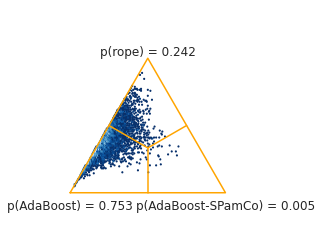

In [17]:
baycomp_ada, bayplot_ada = baycomp.two_on_multiple(
    adaboost_base_score, 
    adaboost_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('AdaBoost','AdaBoost-SPamCo'))

## RandomForrestClassifier

In [20]:
rfc_base_metrics = []
rfc_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':RandomForestClassifier(),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        iters=10
    )

    rfc_base_metrics.append(metrics)
    rfc_base_clfs.append(clfs)

    rfc_base_score = np.array(rfc_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9298245614035088 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.8277777777777777 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.7466666666666667 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8439109639440765 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.722397476340694 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.7861593235425011 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6914285714285714 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.8212765957446808 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.8538102643856921 Labels: 225
Dataset: robot
Validation Iteration: 0 Accuracy: 0.8418803418803419 Labels: 272


In [21]:
rfc_multi_metrics = []
rfc_multi_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')
    
    steps = 20
    views = 2
    
    model =  {
        'classifier':RandomForestClassifier(),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    rfc_multi_metrics.append(metrics)
    rfc_multi_clfs.append(clfs)
    
rfc_multi_score = np.array(rfc_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9298245614035088 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.7518518518518519 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.76 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8306790707452959 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.6908517350157729 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.6375166889185581 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6971428571428572 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.6819357530246141 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.7636080870917574 Labels: 225
Dataset: robot
Validation Iteration: 0 Accuracy: 0.8217948717948718 Labels: 272


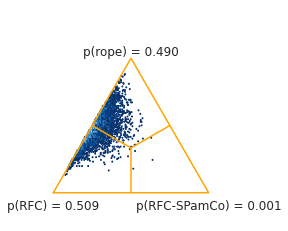

In [22]:
baycomp_rfc, bayplot_rfc = baycomp.two_on_multiple(
    rfc_base_score, 
    rfc_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('RFC','RFC-SPamCo'))

## XGBoost

In [24]:
xgboost_base_metrics = []
xgboost_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=np.arange(0,10),
        iters=10
    )

    xgboost_base_metrics.append(metrics)
    xgboost_base_clfs.append(clfs)

    xgboost_base_score = np.array(xgboost_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9064327485380117 Labels: 39
Dataset: digits
Validation Iteration: 0 Accuracy: 0.8333333333333334 Labels: 125
Dataset: blood
Validation Iteration: 0 Accuracy: 0.7422222222222222 Labels: 52
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8395353726479554 Labels: 17757
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.7634069400630915 Labels: 73
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.821762349799733 Labels: 1048
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6742857142857143 Labels: 40
Dataset: click
Validation Iteration: 0 Accuracy: 0.812348769294952 Labels: 2796
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.8465526179367548 Labels: 450
Dataset: robot
Validation Iteration: 0 Accuracy: 0.8222222222222222 Labels: 545


In [25]:
xgboost_multi_metrics = []
xgboost_multi_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')
    
    steps = 20
    views = 2
    
    model =  {
        'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    xgboost_multi_metrics.append(metrics)
    xgboost_multi_clfs.append(clfs)
    
xgboost_multi_score = np.array(xgboost_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9239766081871345 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.7166666666666667 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.76 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.842360454115421 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.6561514195583596 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.5518469069870939 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6628571428571428 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.555110554860242 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.7579056505961638 Labels: 225
Dataset: robot
Validation Iteration: 0 Accuracy: 0.7311965811965812 Labels: 272


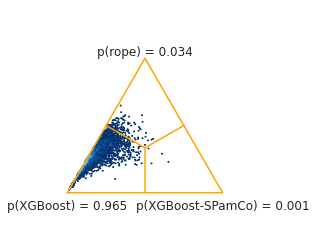

In [26]:
baycomp_xgboost, bayplot_xgboost = baycomp.two_on_multiple(
    xgboost_base_score, 
    xgboost_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('XGBoost','XGBoost-SPamCo'))